# Model Evaluation

### Notebook Content

### Accuracy Metrics for Multi-Class Classification
1. Accuarcy-Score
2. Confusion-Matrix-for-MultiClass
3. ROC-and-AUC
4. Precision-Recall-Curve-for-Multiclass
5. Classification-Report

# Accuracy Metrics for Multi-Class Classification
In multiclass and multilabel classification task, the notions of precision, recall, and F-measures can be applied to each label independently. There are a few ways to combine results across labels, specified by the average argument to the average_precision_score (multilabel only), f1_score, fbeta_score, precision_recall_fscore_support, precision_score and recall_score functions, as described above. <br><br>
Note that if all labels are included, “micro”-averaging in a multiclass setting will produce precision, recall and $F$ that are all identical to accuracy. Also note that “weighted” averaging may produce an F-score that is not between precision and recall.

## Accuarcy Score
The accuracy_score function **computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions**.

**In multilabel classification, the function returns the subset accuracy**. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

If $\hat{y}_i$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value, then the fraction of correct predictions over $n_\text{samples}$ is defined as:<br>
$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$<br>
where $1(x)$ is the indicator function.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>


## Precision, recall and F-measures
The precision is the ratio **tp / (tp + fp)** where tp is the number of true positives and fp the number of false positives. The precision is intuitively the **ability of the classifier not to label as positive a sample that is negative**.<br><br>
The best value is 1 and the worst value is 0.

The **recall** is the ratio **tp / (tp + fn)** where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the **ability of the classifier to find all the positive samples**.

The best value is 1 and the worst value is 0.

The **F-measure** $(F_\beta$ and $F_1$ measures) can be interpreted as a weighted harmonic mean of the precision and recall. A $F_\beta$ measure reaches its best value at 1 and its worst score at 0. With $\beta = 1$, $F_\beta$ and $F_1$ are equivalent, and the recall and the precision are equally important.

The **average_precision_score** function computes the average precision (AP) from prediction scores. The value is between 0 and 1 and higher is better. AP is defined as: <br>
$\text{AP} = \sum_n (R_n - R_{n-1}) P_n$<br>
where $P_n$ and $R_n$ are the precision and recall at the nth threshold. With random predictions, the AP is the fraction of positive samples.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>


To show how these metrics can evaluate our model, we first import the dataset for multiclass classification. We will be using the fruit dataset for classification of fruits on the basis of the features such as mass, height, etc. The dataframe can be downloaded from the following link:<br> https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt

In [32]:
fruits = pd.read_table(r'dataset/Fruit.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


We have 59 pieces of fruits, 7 features in the dataset and 4 types of fruits in the dataset:

In [33]:
#Specify Targets and features
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Scaling Our data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(y_test.shape)
print(X_test.shape)

(15,)
(15, 4)


In [34]:
# Import RF Regressor
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

#fit the model
model = rf.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>


The methods that we have explained above have been demonstrated in the block below

In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print("Precision Score: ", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall_score: ", metrics.recall_score(y_test, y_pred, average='micro'))
print("f1_score: ", metrics.f1_score(y_test, y_pred, average='weighted'))
print("fbeta_score: ", metrics.fbeta_score(y_test, y_pred, average='macro', beta=0.5))
print("precision_recall_fscore_support: ", metrics.precision_recall_fscore_support(y_test, y_pred, beta=0.5, average=None))

accuracy: 86.67%
Precision Score:  0.8666666666666666
Recall_score:  0.8666666666666667
f1_score:  0.8675132275132273
fbeta_score:  0.8712797619047619
precision_recall_fscore_support:  (array([0.8       , 1.        , 1.        , 0.66666667]), array([1.  , 1.  , 0.75, 1.  ]), array([0.83333333, 1.        , 0.9375    , 0.71428571]), array([4, 1, 8, 2], dtype=int64))


## Confusion Matrix for MultiClass
The multilabel_confusion_matrix function **computes class-wise (default) or sample-wise (samplewise=True) multilabel confusion matrix to evaluate the accuracy of a classification**. multilabel_confusion_matrix also treats multiclass data as if it were multilabel, as this is a transformation commonly applied to evaluate multiclass problems with binary classification metrics (such as precision, recall, etc.).

When calculating class-wise multilabel confusion matrix $C$, the count of true negatives for class $i$ is $C_{i,0,0}$, false negatives is $C_{i,1,0}$, true positives is $C_{i,1,1}$ and false positives is $C_{i,0,1}$

Confusion matrix, without normalization
[[4 0 0 0]
 [0 1 0 0]
 [1 0 6 1]
 [0 0 0 2]]


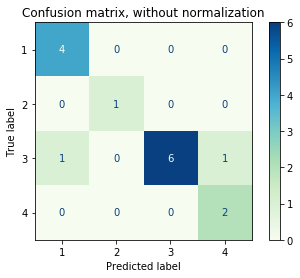

In [36]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None)
                 ]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.GnBu,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    
plt.show()


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>



## ROC and AUC
An example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

**ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis**. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

**ROC curves are typically used in binary classification** to study the output of a classifier. In order to extend ROC curve and ROC area to multi-label classification, **it is necessary to binarize the output**. **One ROC curve can be drawn per label**, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

**Another evaluation measure for multi-label classification is macro-averaging, which gives equal weight to the classification of each label**.

In [37]:
# print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data just check which format is in the file before executing this code
fruits = pd.read_table(r'dataset/Fruit.txt')
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
# Binarize the output
Y_1 = label_binarize(y, classes=[1, 2, 3, 4])
n_classes = Y_1.shape[1]

# Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y_1, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state= 0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

The plot of a ROC curve for a specific class has been shown below


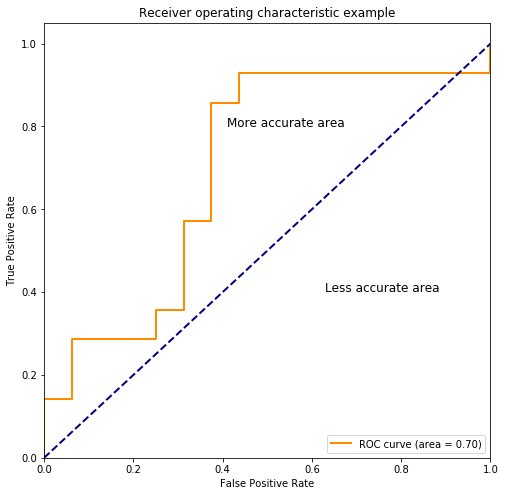

In [38]:
plt.figure(figsize=(8,8))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.text(0.41,0.8,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

Plot ROC curves for all the classes ie a multilabel problem is shown below. It Computes macro-average ROC curve and ROC area. The Defference in Macro-average and micro-average is explained after the plot

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>



In [39]:
fruits.fruit_label.unique()

array([1, 2, 3, 4], dtype=int64)

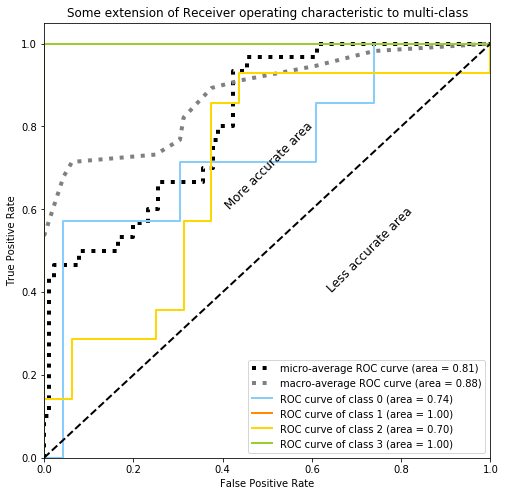

In [40]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='black', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='grey', linestyle=':', linewidth=4)

colors = cycle(['lightskyblue', 'darkorange', 'gold', 'yellowgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="best")
plt.text(0.4,0.6,'More accurate area',fontsize = 12, rotation=45)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12, rotation=45)
plt.show()

**Area under ROC for the multiclass problem**

The func:`sklearn.metrics.roc_auc_score` function can be used for
multi-class classification. The multi-class One-vs-One scheme compares every
unique pairwise combination of classes. In this section, we calculate the AUC
using the OvR and OvO schemes. We report a macro average, and a
prevalence-weighted average.



In [41]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.858890 (macro),
0.797464 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.858890 (macro),
0.797464 (weighted by prevalence)


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Model-Evaluation" role="tab" aria-controls="messages">Go to top<span class="badge badge-primary badge-pill"></span></a>



## Precision Recall Curve for Multiclass
The precision recall curve with the fruit dataset is shown below<br>
Precision-recall curves are typically used in binary classification to study the output of a classifier. In order to extend the precision-recall curve and average precision to multi-class or multi-label classification, it is necessary to binarize the output. One curve can be drawn per label, but one can also draw a precision-recall curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).



In [42]:
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
import warnings

# Import some data 
fruits = pd.read_table(r'dataset/Fruit.txt')
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
random_state = np.random.RandomState(0)



# Limit to the two first classes, and split into training and test
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)
# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5,
                                                    random_state=random_state)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
y_pred = classifier.predict(X_test)

The average precision score in multi-label settings

In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.34


Plot the micro-averaged Precision-Recall curve

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.34')

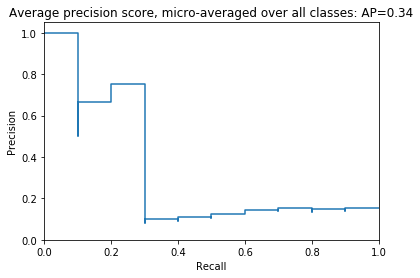

In [44]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

Plot Precision-Recall curve for each class and iso-f1 curves
.............................................................




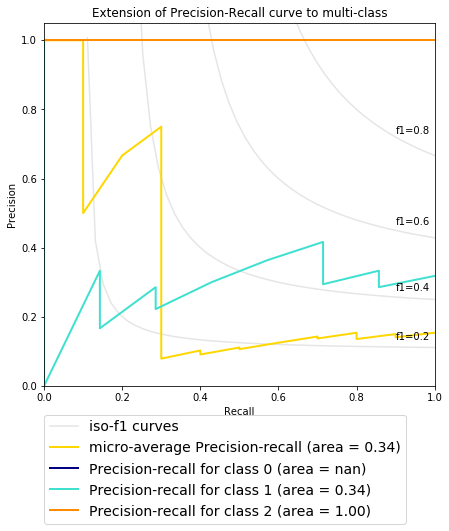

In [45]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

## Classification Report
The classification_report function **builds a text report showing the main classification metrics**. Here is a small example with custom target_names and inferred labels<br>
Below there is an example of classification report to give the evaluation of a logistic regression classification model on the fruit dataset.


In [46]:
from sklearn.linear_model import LogisticRegression
# Import some data 
fruits = pd.read_table(r'dataset/Fruit.txt')
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
#fir Logistic Regression
LogReg = LogisticRegression()
model = LogReg.fit(X_train, y_train)
prediction = model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.37      1.00      0.54         7
           2       1.00      1.00      1.00         3
           3       1.00      0.14      0.25        14
           4       1.00      1.00      1.00         6

    accuracy                           0.60        30
   macro avg       0.84      0.79      0.70        30
weighted avg       0.85      0.60      0.54        30

